# Clustering

Veriyi benzerliklerine göre kümelendirme.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


**Hatırlatma**

Regression - R2, RSME

Classification - Accuracy, Precision, Recall, F1 Score

Clustering - Silhouette Score (sonucun yüksekmasına bakmıyoruz, farklı kümeleme sayılarına bakıyoruz)

In [4]:
x = df[['Mileage', 'Price', 'Cylinder']]

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
x.head()

,Mileage,Price,Cylinder
0,8221,17314.103129,6
1,9135,17542.036083,6
2,13196,16218.847862,6
3,16342,16336.913140,6
4,19832,16339.170324,6


In [7]:
kmeans = KMeans(n_clusters=7)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=7)

In [9]:
tahmin = kmeans.predict(x)

In [10]:
tahmin

array([2, 2, 6, 6, 6, 5, 5, 5, 5, 5, 2, 6, 0, 0, 0, 0, 0, 5, 4, 4, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 6, 6,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 4, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 2, 6, 6, 6, 6, 5, 5, 5, 5, 5, 2, 2, 6, 6, 6, 6,
       6, 5, 5, 4, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 2, 2, 6, 6, 6, 5, 5, 5,
       5, 4, 2, 2, 2, 6, 6, 6, 6, 5, 5, 5, 2, 6, 6, 6, 6, 5, 5, 5, 4, 4,
       2, 6, 6, 6, 5, 5, 5, 5, 5, 4, 2, 2, 6, 6, 6, 5, 5, 5, 5, 5, 2, 2,
       2, 6, 6, 5, 5, 5, 4, 4, 2, 2, 2, 6, 6, 6, 6, 6, 6, 5, 2, 2, 6, 6,
       6, 6, 6, 6, 6, 5, 2, 6, 6, 6, 6, 5, 5, 5, 5, 4, 2, 6, 6, 6, 6, 6,
       6, 5, 5, 4, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 2,

In [11]:
x['Cluster'] = tahmin

In [12]:
x.head()

,Mileage,Price,Cylinder,Cluster
0,8221,17314.103129,6,2
1,9135,17542.036083,6,2
2,13196,16218.847862,6,6
3,16342,16336.913140,6,6
4,19832,16339.170324,6,6


In [13]:
silhouette_score(x, tahmin)

np.float64(0.32861439526821806)

In [14]:
import matplotlib.pyplot as plt

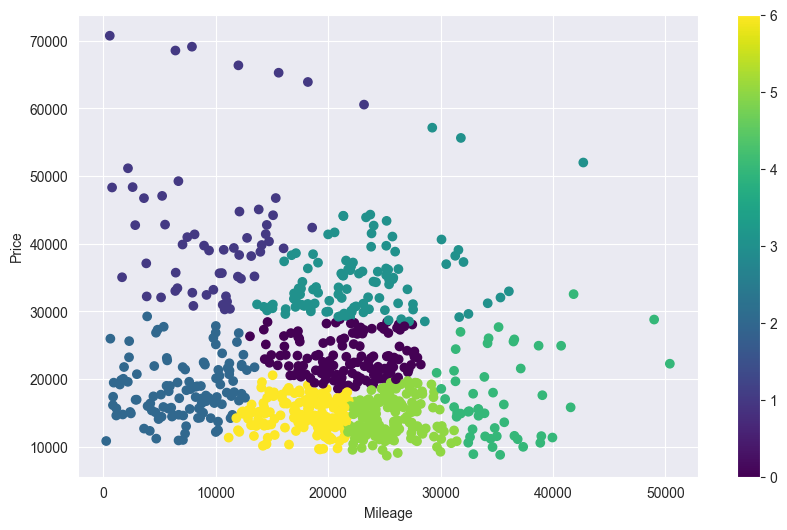

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x['Mileage'], x['Price'], c=x['Cluster'], cmap='viridis')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.colorbar();

In [16]:
wcss = [] # Within Cluster Sum of Squares
ss = [] # Silhouette Score
for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model.fit(x)
    tahmin = model.predict(x)
    ss1 = silhouette_score(x, tahmin)
    ss.append(ss1)
    wcss.append(model.inertia_)

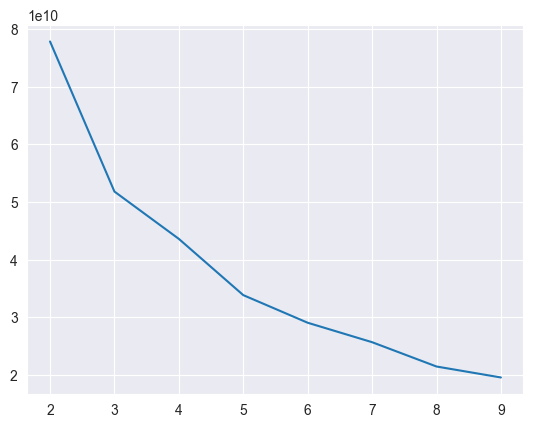

In [17]:
plt.plot(range(2, 10), wcss)

In [18]:
import seaborn as sns

<Axes: >

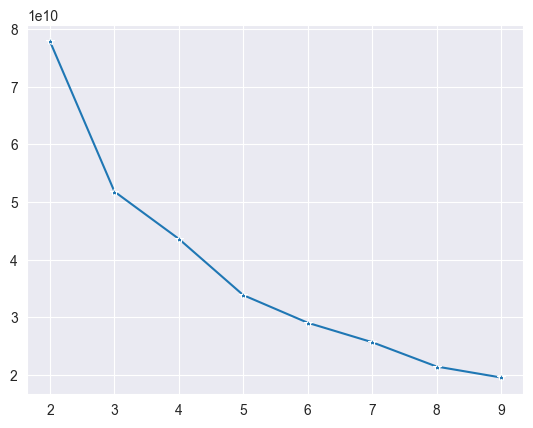

In [19]:
sns.lineplot(x=range(2, 10), y=wcss, marker="*")

In [21]:
from yellowbrick.cluster import KElbowVisualizer

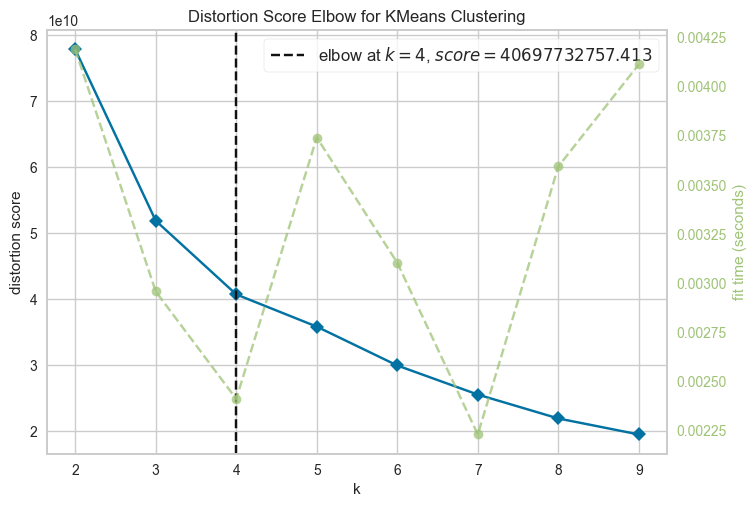

In [36]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(x)
visualizer.show();

In [37]:
# Hierarchical Clustering (Agglomerative) - Dendrogram

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [39]:
data = linkage(x, method='ward', metric='euclidean')

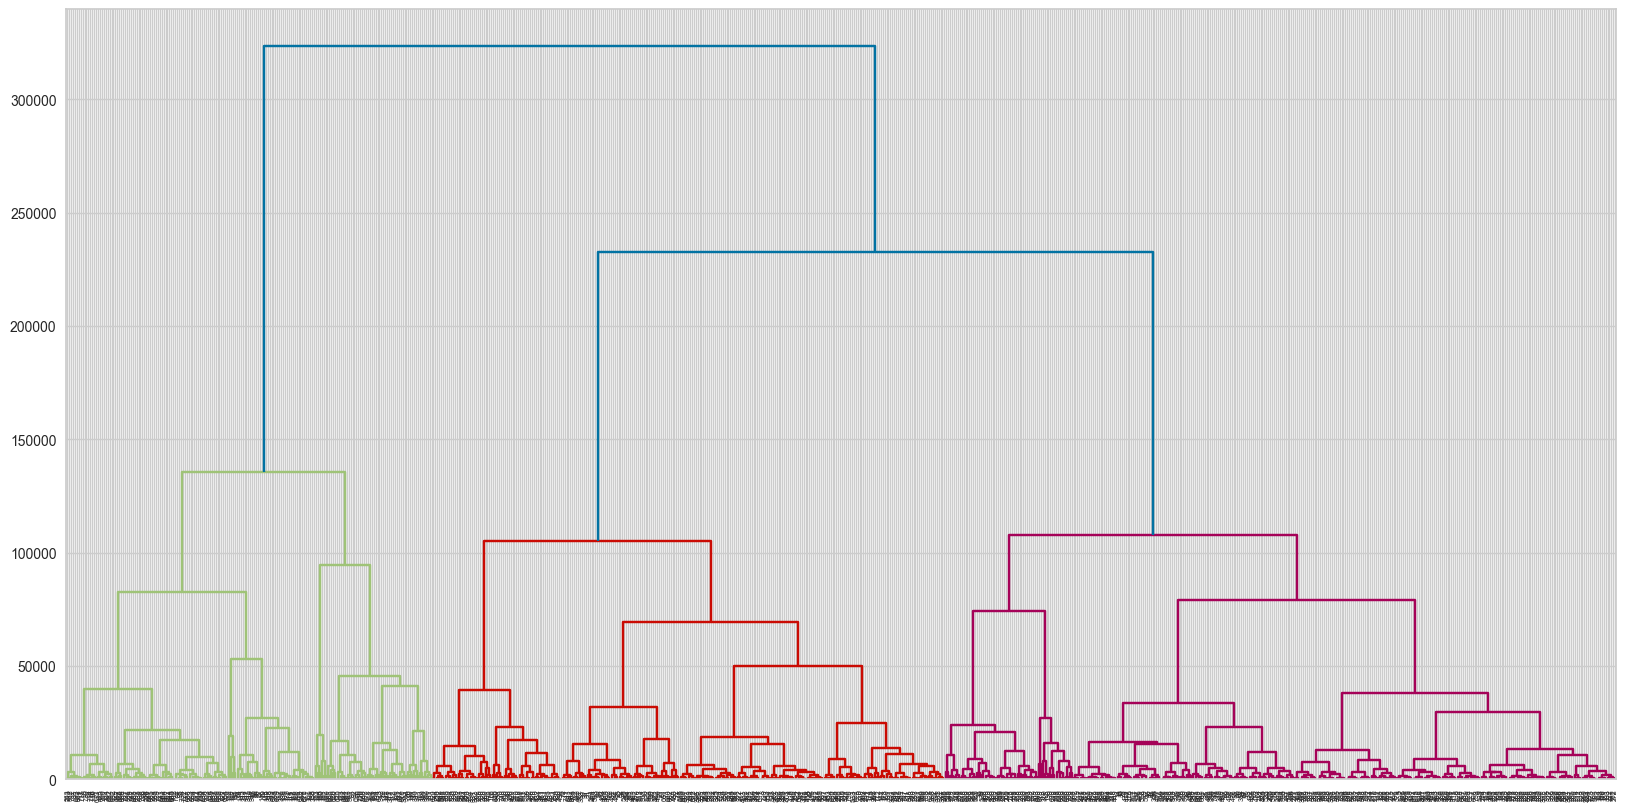

In [46]:
plt.figure(figsize=(20,10))
dendrogram(data);

In [50]:
df = pd.read_csv("billionaires.csv")

In [51]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


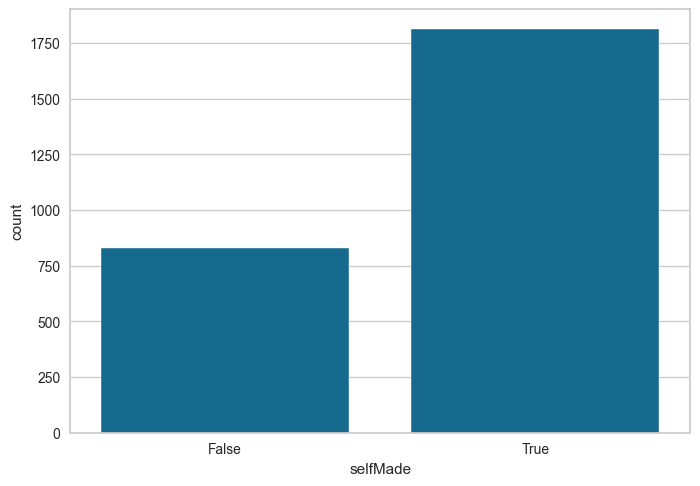

In [53]:
sns.countplot(x=df['selfMade']);

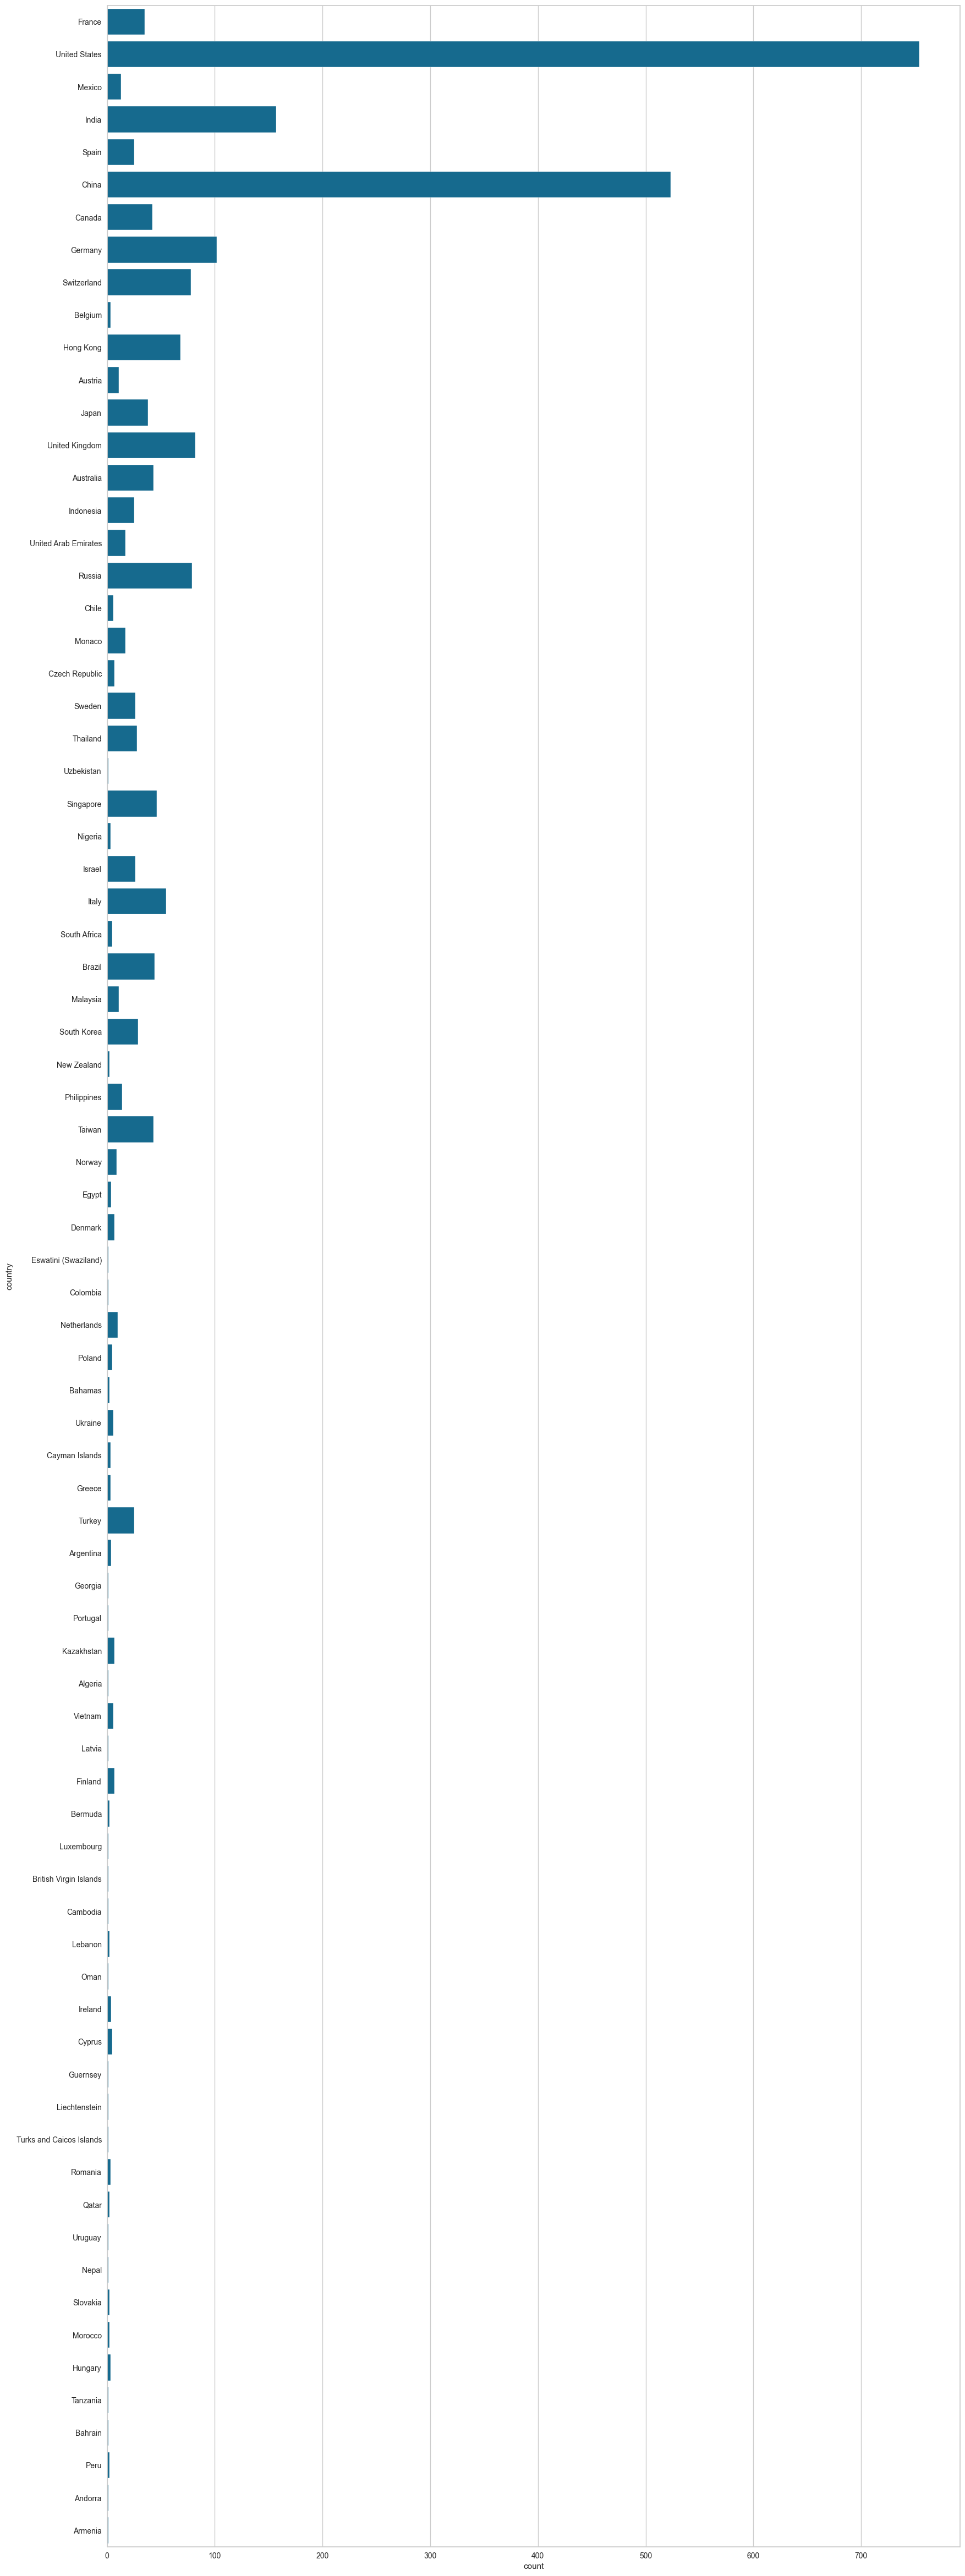

In [57]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country']);

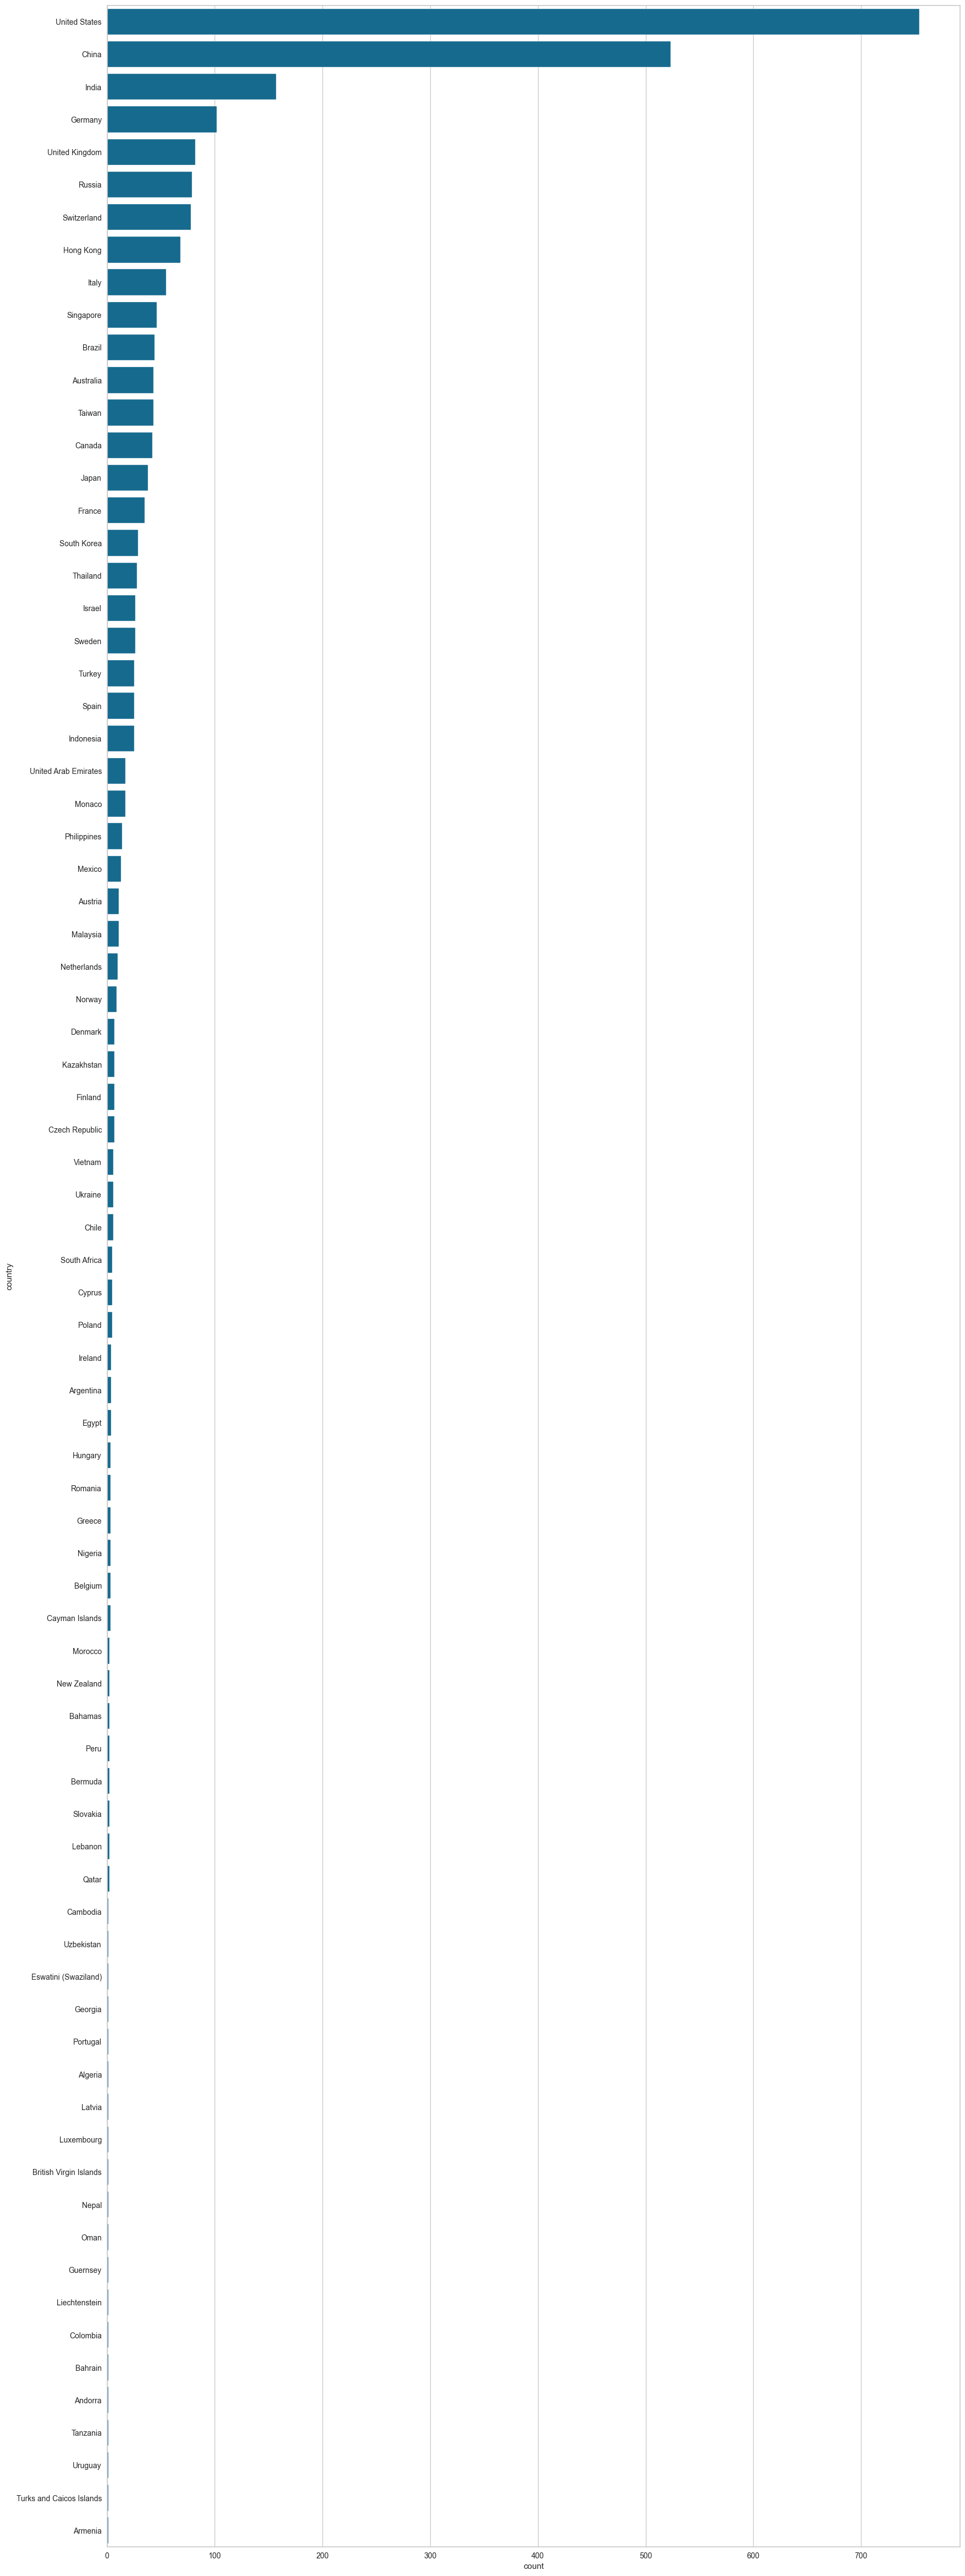

In [66]:
ydf = df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'], order=ydf.index);

In [68]:
tr = df[ df['country'] == 'Turkey' ]

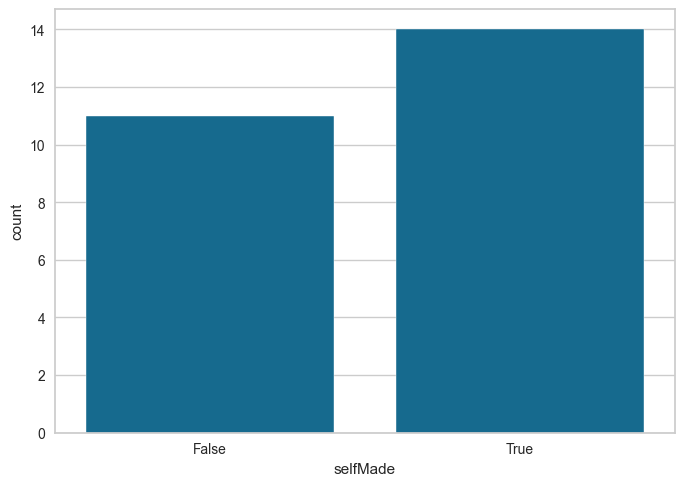

In [70]:
sns.countplot(x=tr['selfMade']);

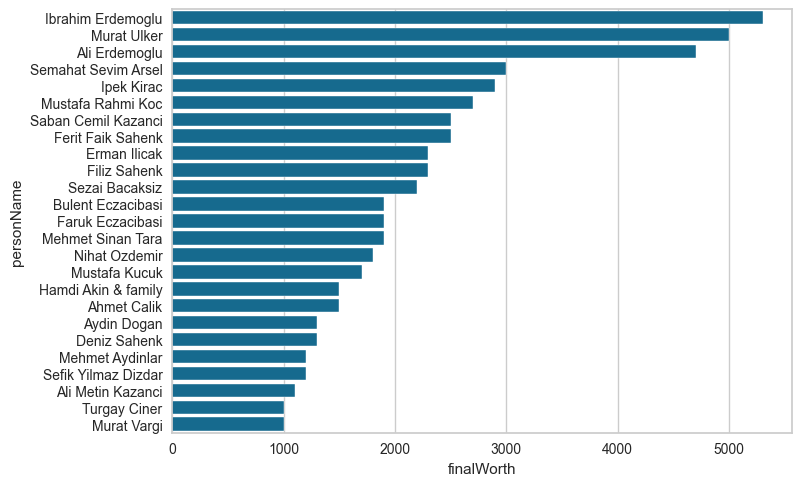

In [78]:
sns.barplot(y=tr['personName'], x=tr['finalWorth']);

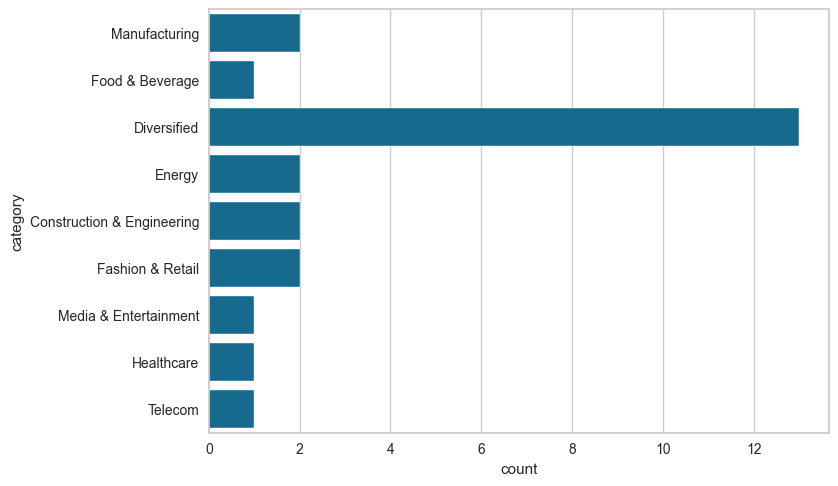

In [80]:
sns.countplot(y=tr['category']);

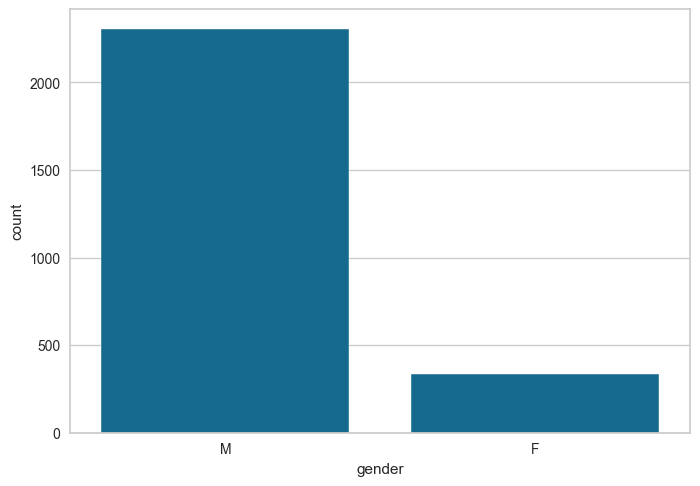

In [83]:
sns.countplot(x=df['gender']);

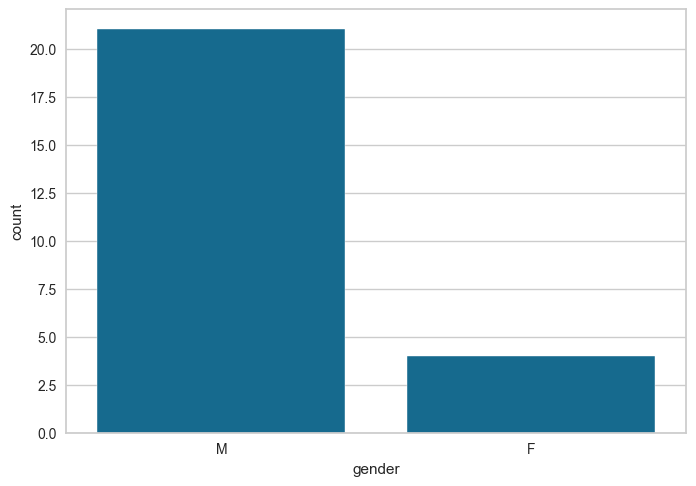

In [84]:
sns.countplot(x=tr['gender']);